In [1]:
import requests
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import cov
import seaborn as sns
import statsmodels.api as sm
! pip install numpy scikit-learn statsmodels

In [2]:
apikey = "14a2c22344444a2fac18026e71f60bf8"
url_current_state_data = f'https://api.covidactnow.org/v2/states.json?apiKey={apikey}'

We want to use current metrics in order to compare case density to vaccination rates so we will parse the api for the metrics and use states as our index

In [3]:
jsn = requests.get(url_current_state_data).json()
df_current_metrics = pd.DataFrame([item['metrics'] for item in jsn], index=[item['state'] for item in jsn] )
df_current_metrics.head()

,testPositivityRatio,testPositivityRatioDetails,caseDensity,weeklyNewCasesPer100k,contactTracerCapacityRatio,infectionRate,infectionRateCI90,icuCapacityRatio,bedsWithCovidPatientsRatio,weeklyCovidAdmissionsPer100k,vaccinationsInitiatedRatio,vaccinationsCompletedRatio,vaccinationsAdditionalDoseRatio,vaccinationsFall2022BivalentBoosterRatio
AK,0.078,{'source': 'other'},7.0,49.3,None,0.90,0.21,0.72,0.012,3.0,0.732,0.652,0.324,0.139
AL,0.041,{'source': 'other'},4.5,31.8,None,1.03,0.10,0.82,0.011,2.4,0.651,0.532,0.212,0.075
AR,0.062,{'source': 'other'},3.4,23.7,None,1.22,0.12,0.76,0.021,4.8,0.700,0.570,0.254,0.108
AZ,0.095,{'source': 'other'},6.7,46.8,None,1.15,0.10,0.70,0.032,5.0,0.783,0.662,0.332,0.154
CA,0.052,{'source': 'other'},4.5,31.7,None,1.05,0.10,0.74,0.029,4.2,0.850,0.749,0.441,0.203


In [4]:
df_current_metrics.cov()

,testPositivityRatio,caseDensity,weeklyNewCasesPer100k,infectionRate,infectionRateCI90,icuCapacityRatio,bedsWithCovidPatientsRatio,weeklyCovidAdmissionsPer100k,vaccinationsInitiatedRatio,vaccinationsCompletedRatio,vaccinationsAdditionalDoseRatio,vaccinationsFall2022BivalentBoosterRatio
testPositivityRatio,0.001103,0.027278,0.191859,0.000403,-0.000164,-0.000260,0.000019,0.009276,-0.001024,-0.001144,-0.000940,-0.000686
caseDensity,0.027278,3.154163,22.078884,0.064910,-0.155595,-0.018032,0.000392,0.464824,-0.032393,-0.028306,-0.004919,-0.021856
weeklyNewCasesPer100k,0.191859,22.078884,154.581976,0.451406,-1.087725,-0.125148,0.002552,3.243882,-0.228368,-0.200459,-0.036917,-0.154083
infectionRate,0.000403,0.064910,0.451406,0.018509,-0.007938,0.001368,0.000235,-0.005499,0.000680,-0.000645,-0.001302,-0.001511
infectionRateCI90,-0.000164,-0.155595,-1.087725,-0.007938,0.036914,-0.001204,-0.000188,0.026459,0.003083,0.003322,0.000986,-0.001701
icuCapacityRatio,-0.000260,-0.018032,-0.125148,0.001368,-0.001204,0.009601,0.000233,0.004231,-0.000223,0.000238,0.000173,0.000090
bedsWithCovidPatientsRatio,0.000019,0.000392,0.002552,0.000235,-0.000188,0.000233,0.000065,0.002059,0.000058,0.000067,0.000100,0.000137
weeklyCovidAdmissionsPer100k,0.009276,0.464824,3.243882,-0.005499,0.026459,0.004231,0.002059,1.054250,-0.003772,-0.005191,0.000036,0.009765
vaccinationsInitiatedRatio,-0.001024,-0.032393,-0.228368,0.000680,0.003083,-0.000223,0.000058,-0.003772,0.012180,0.010457,0.007961,0.004864
vaccinationsCompletedRatio,-0.001144,-0.028306,-0.200459,-0.000645,0.003322,0.000238,0.000067,-0.005191,0.010457,0.009902,0.008311,0.004681


In [5]:
url_votes = "https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv"

In [6]:
df_votes = pd.read_csv(url_votes)
df_votes.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


In [7]:
df_votes = df_votes.set_index('state_name')
df_votes
gop_votes = df_votes.groupby('state_name')['votes_gop'].sum()
total_votes_in_state = df_votes.groupby('state_name')['total_votes'].sum() 

In [8]:
df_voting=pd.concat([gop_votes,total_votes_in_state],axis=1)
df_voting['vote share for GOP'] = df_voting["votes_gop"]/df_voting["total_votes"]
df_voting.head()

,votes_gop,total_votes,vote share for GOP
state_name,,,
Alabama,1441168,2323304,0.620310
Alaska,189892,391346,0.485228
Arizona,1661686,3387326,0.490560
Arkansas,760647,1219069,0.623957
California,6005961,17495906,0.343278


In [9]:
df_current_metrics_new = df_current_metrics.drop(['PR', 'MP'])

In [10]:
df_current_actuals = pd.DataFrame([item['actuals'] for item in jsn], index=[item['state'] for item in jsn] )
df_current_actuals

,cases,deaths,positiveTests,negativeTests,contactTracers,hospitalBeds,hsaHospitalBeds,icuBeds,hsaIcuBeds,newCases,newDeaths,vaccinesDistributed,vaccinationsInitiated,vaccinationsCompleted,vaccinationsAdditionalDose,vaccinationsFall2022BivalentBooster,vaccinesAdministered,vaccinesAdministeredDemographics,vaccinationsInitiatedDemographics
AK,296922,1468,398765,4383121,235,"{'capacity': 1289, 'currentUsageTotal': 954, '...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 127, 'currentUsageTotal': 91, 'cu...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,2158775.0,535364.0,477333.0,237166.0,101944.0,1324490.0,None,None
AL,1655661,21133,1288657,7998883,404,"{'capacity': 12245, 'currentUsageTotal': 8911,...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 1411, 'currentUsageTotal': 1151, ...","{'capacity': None, 'currentUsageTotal': None, ...",1560,0,12296740.0,3191535.0,2610498.0,1040461.0,369560.0,7008089.0,None,None
AR,991724,13074,581269,4810146,790,"{'capacity': 7126, 'currentUsageTotal': 5128, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 822, 'currentUsageTotal': 628, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",714,0,8333870.0,2113686.0,1719258.0,767517.0,326584.0,4865155.0,None,None
AZ,2464334,33372,2217513,14025765,396,"{'capacity': 13266, 'currentUsageTotal': 10686...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 1439, 'currentUsageTotal': 1009, ...","{'capacity': None, 'currentUsageTotal': None, ...",3408,0,19809520.0,5696966.0,4818541.0,2414461.0,1119889.0,14605599.0,None,None
CA,12218091,101555,11792100,160306226,10600,"{'capacity': 58610, 'currentUsageTotal': 46701...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 6349, 'currentUsageTotal': 4678, ...","{'capacity': None, 'currentUsageTotal': None, ...",12518,0,120242535.0,33589831.0,29576417.0,17433884.0,8014499.0,88239336.0,None,None
CO,1778036,14319,1787363,17465447,1300,"{'capacity': 8020, 'currentUsageTotal': 5454, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 886, 'currentUsageTotal': 605, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",1929,0,17678745.0,4833756.0,4244917.0,2455358.0,1244870.0,12995318.0,None,None
CT,981026,12303,1103047,15627007,860,"{'capacity': 7495, 'currentUsageTotal': 5974, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 895, 'currentUsageTotal': 635, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",473,0,11815595.0,3666615.0,2965346.0,1650105.0,895396.0,9018935.0,None,None
DC,178667,1434,287419,5550626,268,"{'capacity': 3307, 'currentUsageTotal': 2605, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 319, 'currentUsageTotal': 238, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,NaN,NaN,NaN,NaN,NaN,NaN,None,"{'age': {'12-15': 17298, '16-17': 7709, '16-19..."
DE,333609,3380,363084,3862790,211,"{'capacity': 2415, 'currentUsageTotal': 1900, ...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 181, 'currentUsageTotal': 120, 'c...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,3327515.0,861253.0,715460.0,369436.0,204118.0,2166103.0,None,None
FL,7542869,87141,8402834,58002013,2600,"{'capacity': 46656, 'currentUsageTotal': 34535...","{'capacity': None, 'currentUsageTotal': None, ...","{'capacity': 5274, 'currentUsageTotal': 3854, ...","{'capacity': None, 'currentUsageTotal': None, ...",0,0,61163245.0,17790290.0,14960333.0,6574418.0,2459584.0,42173438.0,None,"{'age': {'12-14': 91571, '15-24': 774834, '25-..."


In [11]:
df_population= pd.DataFrame([item['population'] for item in jsn], index=[item['state'] for item in jsn] )
df_population.head()

,0
AK,731545
AL,4903185
AR,3017804
AZ,7278717
CA,39512223


In [12]:
df_current_actuals["population"] = df_population

In [13]:
df_current_actuals_new = df_current_actuals.drop(['PR', 'MP'])

In [14]:
df_analyze = pd.DataFrame()

In [15]:
df_analyze["DeathsPer100k"] = df_current_actuals_new["deaths"]/df_current_actuals_new["population"] *100000
df_analyze["VaccinationsCompletedPercentage"] = df_current_actuals_new["vaccinationsCompleted"]/df_current_actuals_new["population"] *100
df_analyze["Ratio_of_People_with_Booster_Shot"] = df_current_actuals_new["vaccinationsAdditionalDose"]/df_current_actuals_new["population"]
df_analyze["ICU_Capacity_Ratio"] = df_current_metrics["icuCapacityRatio"]

In [16]:
df_analyze.head()

,DeathsPer100k,VaccinationsCompletedPercentage,Ratio_of_People_with_Booster_Shot,ICU_Capacity_Ratio
AK,200.671182,65.249985,0.324199,0.72
AL,431.005561,53.240863,0.212201,0.82
AR,433.228931,56.970499,0.254330,0.76
AZ,458.487396,66.200417,0.331715,0.70
CA,257.021732,74.853842,0.441228,0.74


<AxesSubplot:>

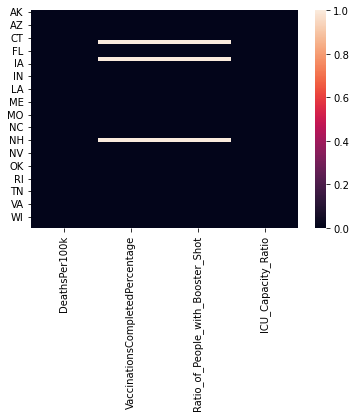

In [17]:
columns = df_analyze.columns 
sns.heatmap(df_analyze[columns].isnull()) 

In [18]:
mean_value_VaccinationsCompletedPercentage=df_analyze['VaccinationsCompletedPercentage'].mean()
df_analyze['VaccinationsCompletedPercentage'].fillna(value=mean_value_VaccinationsCompletedPercentage, inplace=True)

In [19]:
mean_value_Ratio_of_People_with_Booster_Shot=df_analyze['Ratio_of_People_with_Booster_Shot'].mean()
df_analyze['Ratio_of_People_with_Booster_Shot'].fillna(value=mean_value_Ratio_of_People_with_Booster_Shot, inplace=True)

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression

In [21]:
X= df_analyze["VaccinationsCompletedPercentage"]
y= df_analyze["DeathsPer100k"]

In [22]:
X = sm.add_constant(X)

In [23]:
import statsmodels.api as sm
sm_model = sm.OLS(y, X)
results = sm_model.fit()

print(results.summary())
                              

                            OLS Regression Results                            
Dep. Variable:          DeathsPer100k   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     8.343
Date:                Tue, 25 Apr 2023   Prob (F-statistic):            0.00575
Time:                        17:57:55   Log-Likelihood:                -295.14
No. Observations:                  51   AIC:                             594.3
Df Residuals:                      49   BIC:                             598.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [24]:
from tkinter import *
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [ ]:
root = tk.Tk()
root.geometry("1000x500")
root.title('Start Page')



def open_window1():
    window = tk.Toplevel(root)
    window.title('Case Density')
    fig,(ax1, ax2) = plt.subplots(2, figsize = (5,15))
    ax1.scatter(df_current_metrics['vaccinationsInitiatedRatio'], df_current_metrics['caseDensity'], color='blue')
    ax1.set_title('Current Vaccine Initiated Ratio vs Case Density')
    ax1.set_xlabel("Vaccines Initiated Ratio %")
    ax1.set_ylabel("Case Density, %")
    ax2.scatter(df_voting["vote share for GOP"], df_current_metrics_new['caseDensity'], color='red')
    ax2.set_title('Vote Share for GOP vs Case Density')
    ax2.set_xlabel("Vote Share for GOP %")
    ax2.set_ylabel("Case Density%")
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()
    
def open_window2():
    
    window=tk.Toplevel(root)
    window.title('Death Rate')
    
    fig,ax=plt.subplots()
    
    ax.scatter(df_analyze["VaccinationsCompletedPercentage"], y= df_analyze["DeathsPer100k"], color='Blue')
    ax.set_title('Vaccine Completed Percentage VS Death Rate Per 100k')
    ax.set_xlabel("Vaccine Completed Percentage")
    ax.set_ylabel("Death Rate per 100k")
    
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()
    


label = tk.Label(root, text= 'Welcome to our Covid Data Analysis Page', font=('Nexa', 24))
label.pack(padx=20,pady=20)
button1 = tk.Button(root, text="What Affects Case Density", command= open_window1)
button1.pack(padx=5,pady=5)

button2 = tk.Button(root, text="What Affects Death Rate", command = open_window2)
button2.pack(padx=5,pady=5)

    
root.mainloop()

# documentation
https://geopandas.org/en/stable/docs/user_guide/mapping.html#choropleth-maps
https://pypi.org/project/Shapely/
https://hub.arcgis.com/datasets/CMHS::states-shapefile/about

<AxesSubplot:>

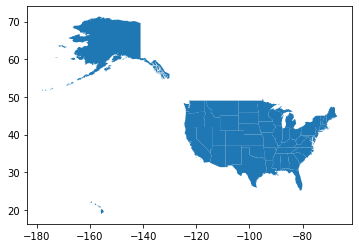

In [39]:
# !pip install geopandas
# !pip install shapely

import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

shapefile = "states.geojson"
readmap = gpd.read_file(shapefile)
readmap.plot()

In [45]:
readmap = readmap.rename(columns={'Program':'program', 'State_Code':'state_code', 'State_Name':'state_name', 'Flowing_St':'flowing_st'})
readmap.columns

df_analyze_statecol = df_analyze.copy()
df_analyze_statecol.index.name = 'state_code'
df_analyze_statecol

,DeathsPer100k,VaccinationsCompletedPercentage,Ratio_of_People_with_Booster_Shot,ICU_Capacity_Ratio
state_code,,,,
AK,200.671182,65.249985,0.324199,0.72
AL,431.005561,53.240863,0.212201,0.82
AR,433.228931,56.970499,0.254330,0.76
AZ,458.487396,66.200417,0.331715,0.70
CA,257.021732,74.853842,0.441228,0.74
CO,248.648314,73.712652,0.426371,0.68
CT,345.077409,83.172715,0.462825,0.71
DC,203.188386,67.436000,0.353239,0.75
DE,347.106691,73.473655,0.379390,0.66


In [50]:
merged_df = readmap.merge(df_analyze_statecol, on="state_code")
print(merged_df)

    FID          program state_code            state_name flowing_st  FID_1  \
0     1  PERMIT TRACKING         AL               ALABAMA          F    919   
1     2                          AK                ALASKA          N    920   
2     3          AZURITE         AZ               ARIZONA          F    921   
3     4              PDS         AR              ARKANSAS          F    922   
4     5                          CA            CALIFORNIA          N    923   
5     6           ECOMAP         CO              COLORADO          F    924   
6     7             SIMS         CT           CONNECTICUT          F    925   
7     8                          DE              DELAWARE          P    926   
8     9                          DC  DISTRICT OF COLUMBIA          P    927   
9    10                          FL               FLORIDA          P    928   
10   11                          GA               GEORGIA          N    929   
11   12           HI-EHW         HI                H

<AxesSubplot:>

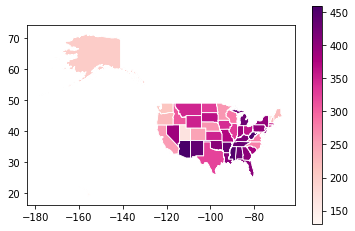

In [54]:
merged_df.plot(column='DeathsPer100k',
            cmap='RdPu',
            linewidth=0.9,
            edgecolor='1',
            legend=True, missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)

#vaccines completed
#boosted
#case density 